
SENTIMENTAL ANALYSIS



# 3. SENTIMENTAL ANALYSIS:

  Sentiment analysis is basically concerned with analysis of emotions and opinions from text.

 A sentiment evaluation system for text analysis combines natural language processing (NLP) and laptop mastering methods to assign weighted sentiment scores to the entities, topics, issues and categories inside a sentence or phrase.It tries to find and justify sentiment of the person with respect to a given source of content.

I am proposing a better accurate model of sentiment analysis from a datasets containing movie review score with the help of classifier LogisticRegression, the application can correctly classify the reviews of the given datasets as positive and negative to give sentiment of each movie.

In [37]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# 4.2. Import the data:
df=pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [7]:
#sentiment count:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

 **PREPROCESSING**

In [42]:
df.rename(columns={'review':'text'}, inplace = True)
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [43]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df)):
  text=re.sub('[^a-zA-Z]', ' ',df['text'][i])
  text=text.lower()
  text=text.split()
  text=[ps.stem(word) for word in text if not word  in stopwords.words('english')]
  text=" ".join(text)
  corpus.append(text)

In [44]:
corpus[3]

'basic famili littl boy jake think zombi closet parent fight time br br movi slower soap opera suddenli jake decid becom rambo kill zombi br br ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot br br well play parent descent dialog shot jake ignor'

In [45]:
#TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [46]:
X.shape

(50000, 5000)

In [47]:
y=df['sentiment']

In [48]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [50]:

tfidf_v.get_feature_names_out()[:50]

array(['abandon', 'abc', 'abil', 'abl', 'absenc', 'absolut',
       'absolut noth', 'absorb', 'absurd', 'abus', 'abysm', 'academi',
       'academi award', 'accent', 'accept', 'access', 'accid', 'accident',
       'acclaim', 'accompani', 'accomplish', 'accord', 'account', 'accur',
       'accus', 'achiev', 'acknowledg', 'across', 'act', 'act bad',
       'act br', 'act br br', 'act direct', 'act film', 'act good',
       'act great', 'act like', 'act movi', 'act terribl', 'act well',
       'action', 'action film', 'action movi', 'action scene',
       'action sequenc', 'activ', 'actor', 'actor actress', 'actor br',
       'actor br br'], dtype=object)

In [51]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [52]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())


In [53]:

count_df.head()

,abandon,abc,abil,abl,absenc,absolut,absolut noth,absorb,absurd,abus,...,young boy,young girl,young man,young peopl,young woman,younger,youth,zero,zombi,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier=LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

Accuracy is 0.888

Confusion Matrix:


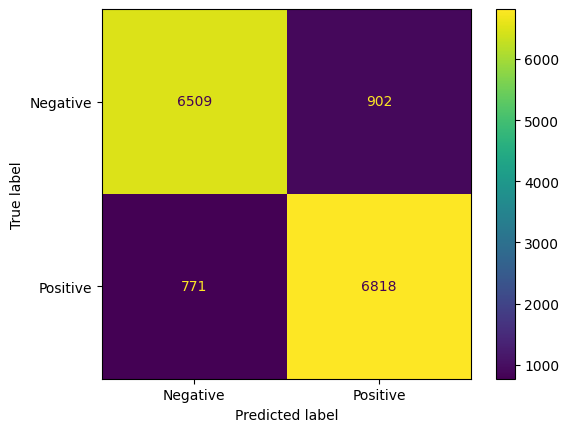

In [63]:
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy is %0.3f\n" % accuracy)
print("Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Positive'])
cm_display.plot()
plt.show()

#Negative-0,Positive -1
